In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [32]:
resolution_value = 1200

In [34]:
# Read the CSV file
df = pd.read_csv('graphs9_29.csv')
labels = ['BigValley'] * 51 + ['Sonoma'] * 51 + ['East Contra Costa'] * 51 + ['Fillmore'] * 51 + ['San Luis Obispo'] * 51

# Assign this list as a new column 'GSP' in the DataFrame
df['GSP'] = labels

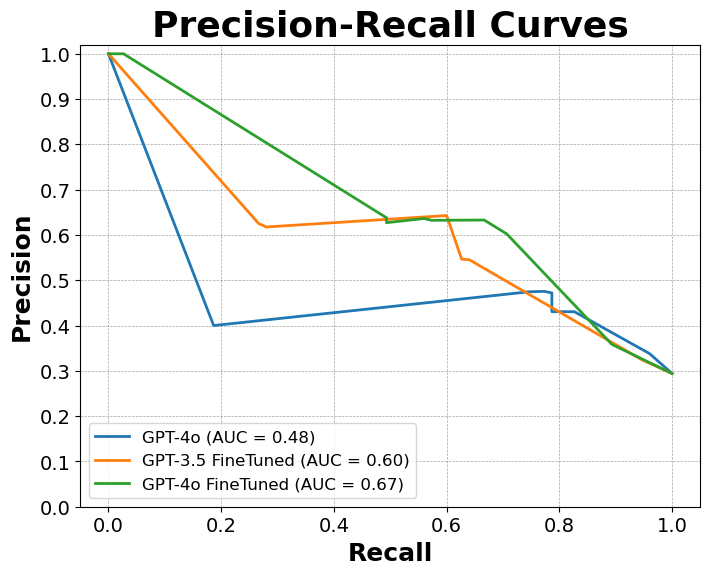

In [35]:
# Extract the true labels
y_true = df['Human Answers']
y_true = [1 if value == 'Yes' else 0 for value in y_true]

# Define the score columns and corresponding labels and colors
score_columns = ['Rocs_Straight', 'Rocs_3.5', 'Rocs_4o']
labels = ['GPT-4o', 'GPT-3.5 FineTuned', 'GPT-4o FineTuned']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Create a figure
plt.figure(figsize=(8, 6))

# Loop over each score column to compute and plot the Precision-Recall curve
for y_scores_col, label, color in zip(score_columns, labels, colors):
    y_scores = df[y_scores_col]
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    auprc = auc(recall, precision)
    plt.plot(recall, precision, color=color, lw=2,
             label=f'{label} (AUC = {auprc:.2f})')

# Customize the grid
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Set the x and y axis labels
plt.xlabel('Recall', fontsize=18, fontweight='bold')
plt.ylabel('Precision', fontsize=18, fontweight='bold')

# Set the plot title with enhanced font size
plt.title('Precision-Recall Curves', fontsize=26, fontweight='bold')

# Place the legend in an optimal position
plt.legend(loc="lower left", fontsize=12)

# Set y-limits and y-ticks more precisely
plt.ylim([0.0, 1.02])
plt.yticks([i/10.0 for i in range(11)], fontsize=14)
plt.xticks(fontsize=14)

plt.savefig('final_vis_c.png', dpi=1200)
# Show the plot
plt.show()

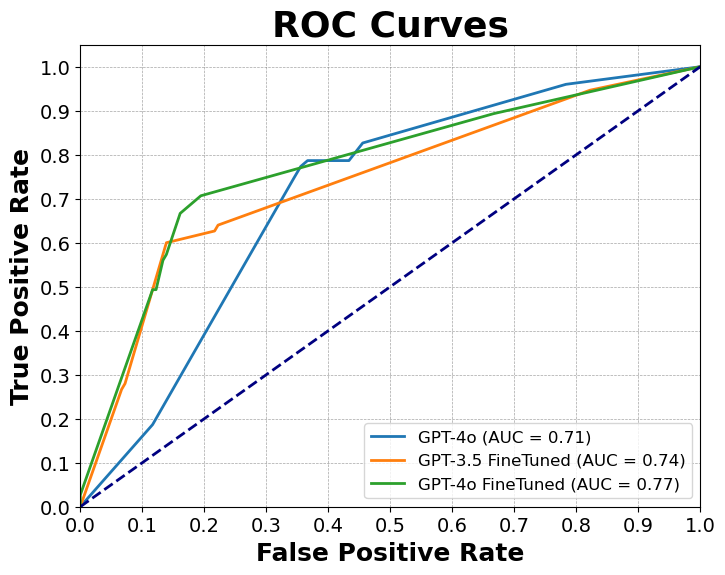

In [13]:
# Create a figure
plt.figure(figsize=(8, 6))

# Loop over each score column to compute and plot the ROC curve
for y_scores_col, label, color in zip(score_columns, labels, colors):
    y_scores = df[y_scores_col]
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2,
             label=f'{label} (AUC = {roc_auc:.2f})')

# Plot the baseline (diagonal line)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Setting limits and ticks for precision
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks([i/10 for i in range(11)], fontsize=14)  # Customizing tick marks
plt.yticks([i/10 for i in range(11)], fontsize=14)

# Setting labels with font size customization
plt.xlabel('False Positive Rate', fontsize=18, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=18, fontweight='bold')

# Set the title with an adjusted font size
plt.title('ROC Curves', fontsize=26, fontweight='bold')

# Adding a grid for better readability
plt.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.7)

# Positioning the legend for better visibility
plt.legend(loc="lower right", fontsize=12)

plt.savefig('final_vis_d.png', dpi=1200)
# Show the plot
plt.show()

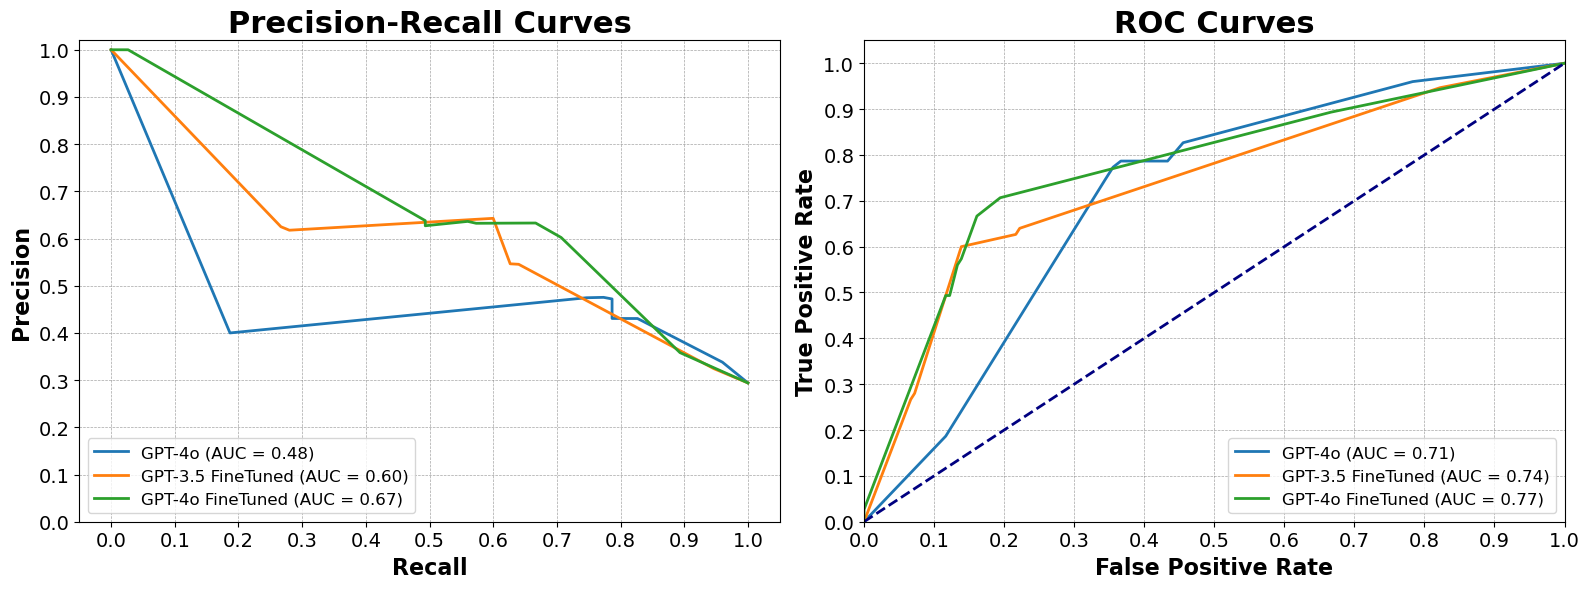

In [15]:
# Read the CSV file
df = pd.read_csv('graphs9_29.csv')

# Extract the true labels
y_true = df['Human Answers']
y_true = [1 if value == 'Yes' else 0 for value in y_true]

# Define the score columns and corresponding labels and colors
score_columns = ['Rocs_Straight', 'Rocs_3.5', 'Rocs_4o']
labels = ['GPT-4o', 'GPT-3.5 FineTuned', 'GPT-4o FineTuned']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

### Precision-Recall Curves (Left Plot)
for y_scores_col, label, color in zip(score_columns, labels, colors):
    y_scores = df[y_scores_col]
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    auprc = auc(recall, precision)
    axes[0].plot(recall, precision, color=color, lw=2,
                 label=f'{label} (AUC = {auprc:.2f})')

# Customize the Precision-Recall plot (left)
axes[0].set_title('Precision-Recall Curves', fontsize=22, fontweight='bold')
axes[0].set_xlabel('Recall', fontsize=16, fontweight='bold')
axes[0].set_ylabel('Precision', fontsize=16, fontweight='bold')
axes[0].set_ylim([0.0, 1.02])
axes[0].set_xticks([i/10.0 for i in range(11)])
axes[0].set_yticks([i/10.0 for i in range(11)])
axes[0].tick_params(axis='both', labelsize=14)
axes[0].grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.7)
axes[0].legend(loc="lower left", fontsize=12)

### ROC Curves (Right Plot)
for y_scores_col, label, color in zip(score_columns, labels, colors):
    y_scores = df[y_scores_col]
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    axes[1].plot(fpr, tpr, color=color, lw=2,
                 label=f'{label} (AUC = {roc_auc:.2f})')

# Plot the baseline (diagonal line)
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the ROC plot (right)
axes[1].set_title('ROC Curves', fontsize=22, fontweight='bold')
axes[1].set_xlabel('False Positive Rate', fontsize=16, fontweight='bold')
axes[1].set_ylabel('True Positive Rate', fontsize=16, fontweight='bold')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xticks([i/10 for i in range(11)])
axes[1].set_yticks([i/10 for i in range(11)])
axes[1].tick_params(axis='both', labelsize=14)
axes[1].grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.7)
axes[1].legend(loc="lower right", fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('final_vis_e.png', dpi=1200)
plt.show()

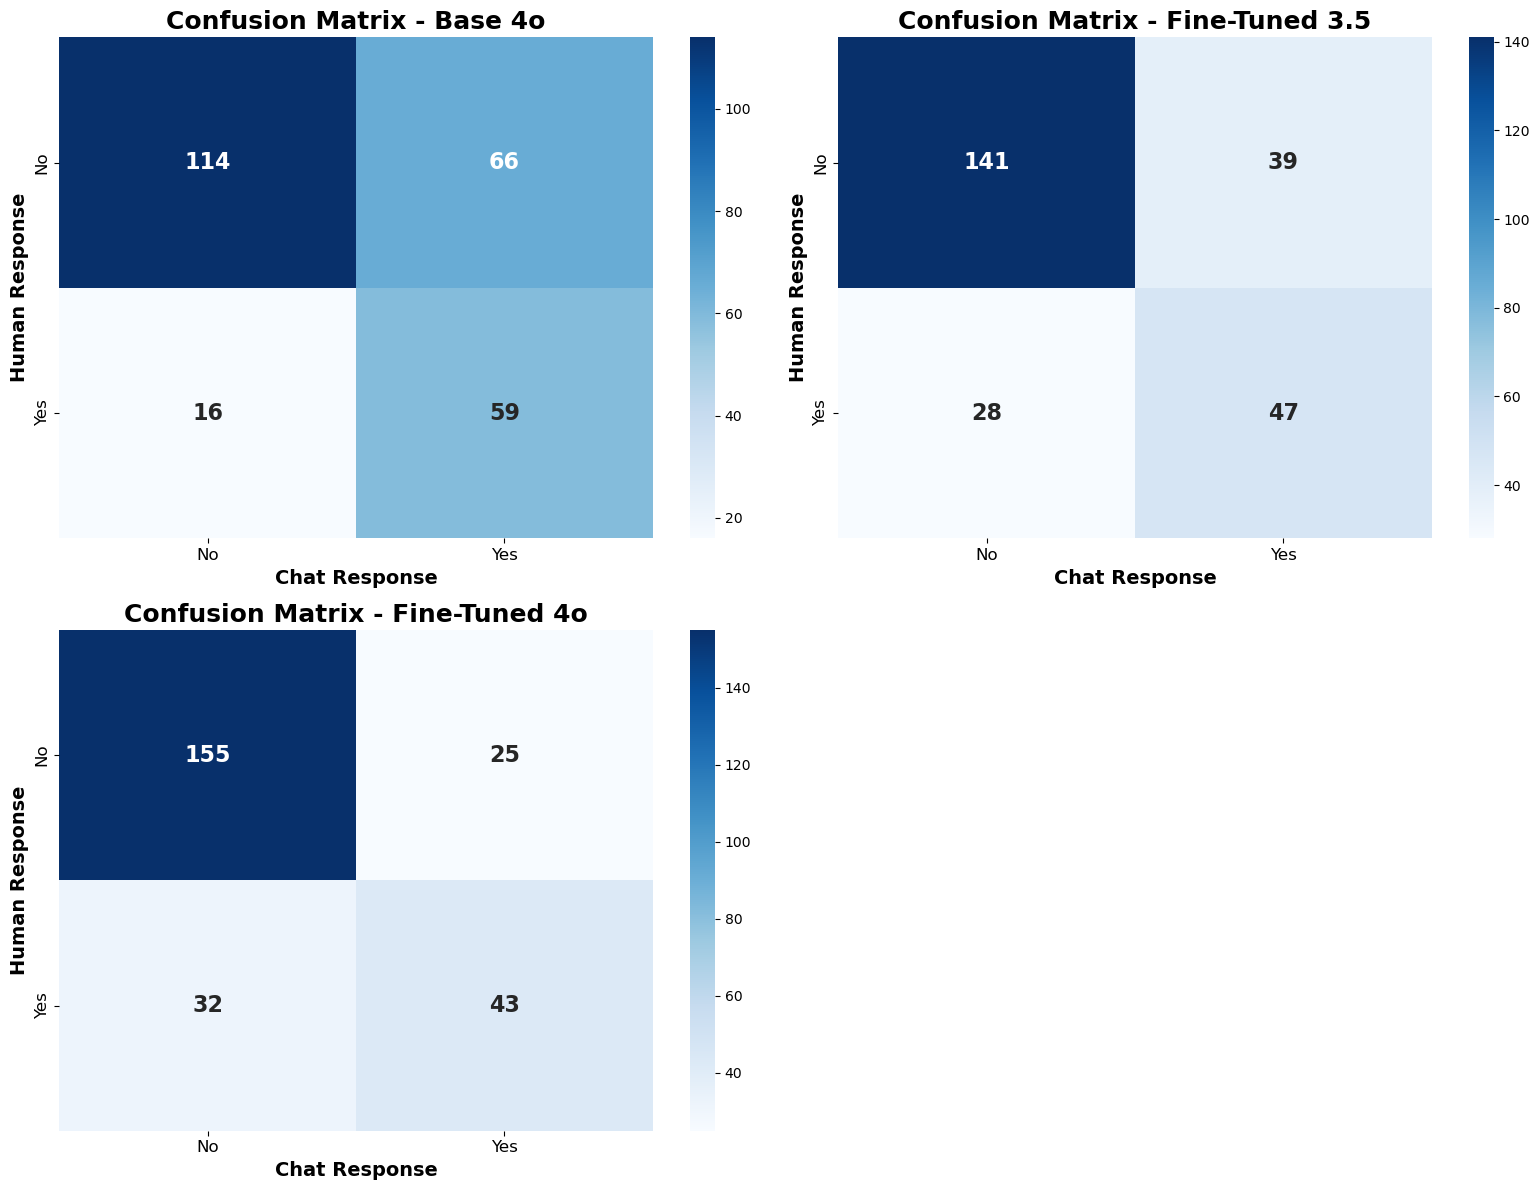

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load your CSV file (assuming it's named 'graphs9_29.csv' based on the screenshot)
df = pd.read_csv('graphs9_29.csv')

# Map 'Human Answers' to y_test (using the provided mapping for binary classification)
human_response_mapping = {
    'Yes': 'Yes',
    'No': 'No',
    'Somewhat': 'No'
}

# Apply the mapping to the Human_Answers column
df['Human Answers'] = df['Human Answers'].map(human_response_mapping).fillna('No')

# Label encode the human responses (y_test)
le = LabelEncoder()
y_test = le.fit_transform(df['Human Answers'].values)

# Define the columns corresponding to y_pred
y_pred_columns = ['Rocs_Straight', 'Rocs_3.5', 'Rocs_4o']
titles = ['Confusion Matrix - Base 4o', 'Confusion Matrix - Fine-Tuned 3.5', 'Confusion Matrix - Fine-Tuned 4o']

# Create a 2x2 grid for plotting confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Flatten the axes array to make it easier to index
axes = axes.ravel()

# Threshold for converting probabilities to binary predictions
threshold = 0.5

# Loop through each y_pred column, calculate confusion matrix, and plot
for i, y_pred_col in enumerate(y_pred_columns):
    # Convert probabilities to binary predictions
    y_pred = np.where(df[y_pred_col] >= threshold, 1, 0)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Create confusion matrix visualization
    conf_matrix_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
    
    # Plot the confusion matrix in the appropriate subplot
    sns.heatmap(conf_matrix_df, annot=True, cmap='Blues', fmt='g', annot_kws={'size': 16, 'weight': 'bold'}, ax=axes[i])
    axes[i].set_title(titles[i], fontsize=18, fontweight='bold')
    axes[i].set_ylabel('Human Response', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Chat Response', fontsize=14, fontweight='bold')
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)

# Remove the extra subplot (bottom right) since we only have 3 matrices
fig.delaxes(axes[3])

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.savefig('final_vis_f.png', dpi=1200)
# Show the plot
plt.show()

In [36]:
# Create a function to convert ROC values to binary predictions
def roc_to_prediction(roc_value):
    if roc_value > 0.5:
        return 'Yes'
    elif roc_value < 0.5:
        return 'No'
    else:
        return np.nan  # Exclude values that are exactly 0.5

# Function to calculate accuracy
def calculate_accuracy(group, column_name):
    # Get the human answers and predictions
    human_answers = group['Human Answers']
    predictions = group[column_name].apply(roc_to_prediction)
    
    # Drop rows where predictions are NaN (ROC = 0.5)
    valid_data = group[~predictions.isna()]
    valid_predictions = predictions.dropna()
    
    # Calculate accuracy by comparing predictions to human answers
    correct_predictions = (valid_data['Human Answers'] == valid_predictions).sum()
    total_predictions = len(valid_predictions)
    
    if total_predictions == 0:
        return np.nan  # Return NaN if there are no valid predictions
    else:
        return correct_predictions / total_predictions

# Group the dataframe by 'GSP' and calculate accuracy for each GSP and ROC column
roc_columns = ['Rocs_Straight', 'Rocs_3.5', 'Rocs_4o']

# Iterate over each ROC column and calculate accuracy for each GSP
for roc_col in roc_columns:
    print(f"Accuracy for {roc_col}:")
    accuracy_per_gsp = df.groupby('GSP').apply(lambda group: calculate_accuracy(group, roc_col))
    print(accuracy_per_gsp)
    print("\n")

Accuracy for Rocs_Straight:
GSP
BigValley            0.686275
East Contra Costa    0.509804
Fillmore             0.666667
San Luis Obispo      0.686275
Sonoma               0.588235
dtype: float64


Accuracy for Rocs_3.5:
GSP
BigValley            0.816327
East Contra Costa    0.744681
Fillmore             0.645833
San Luis Obispo      0.765957
Sonoma               0.666667
dtype: float64


Accuracy for Rocs_4o:
GSP
BigValley            0.823529
East Contra Costa    0.680000
Fillmore             0.784314
San Luis Obispo      0.725490
Sonoma               0.620000
dtype: float64




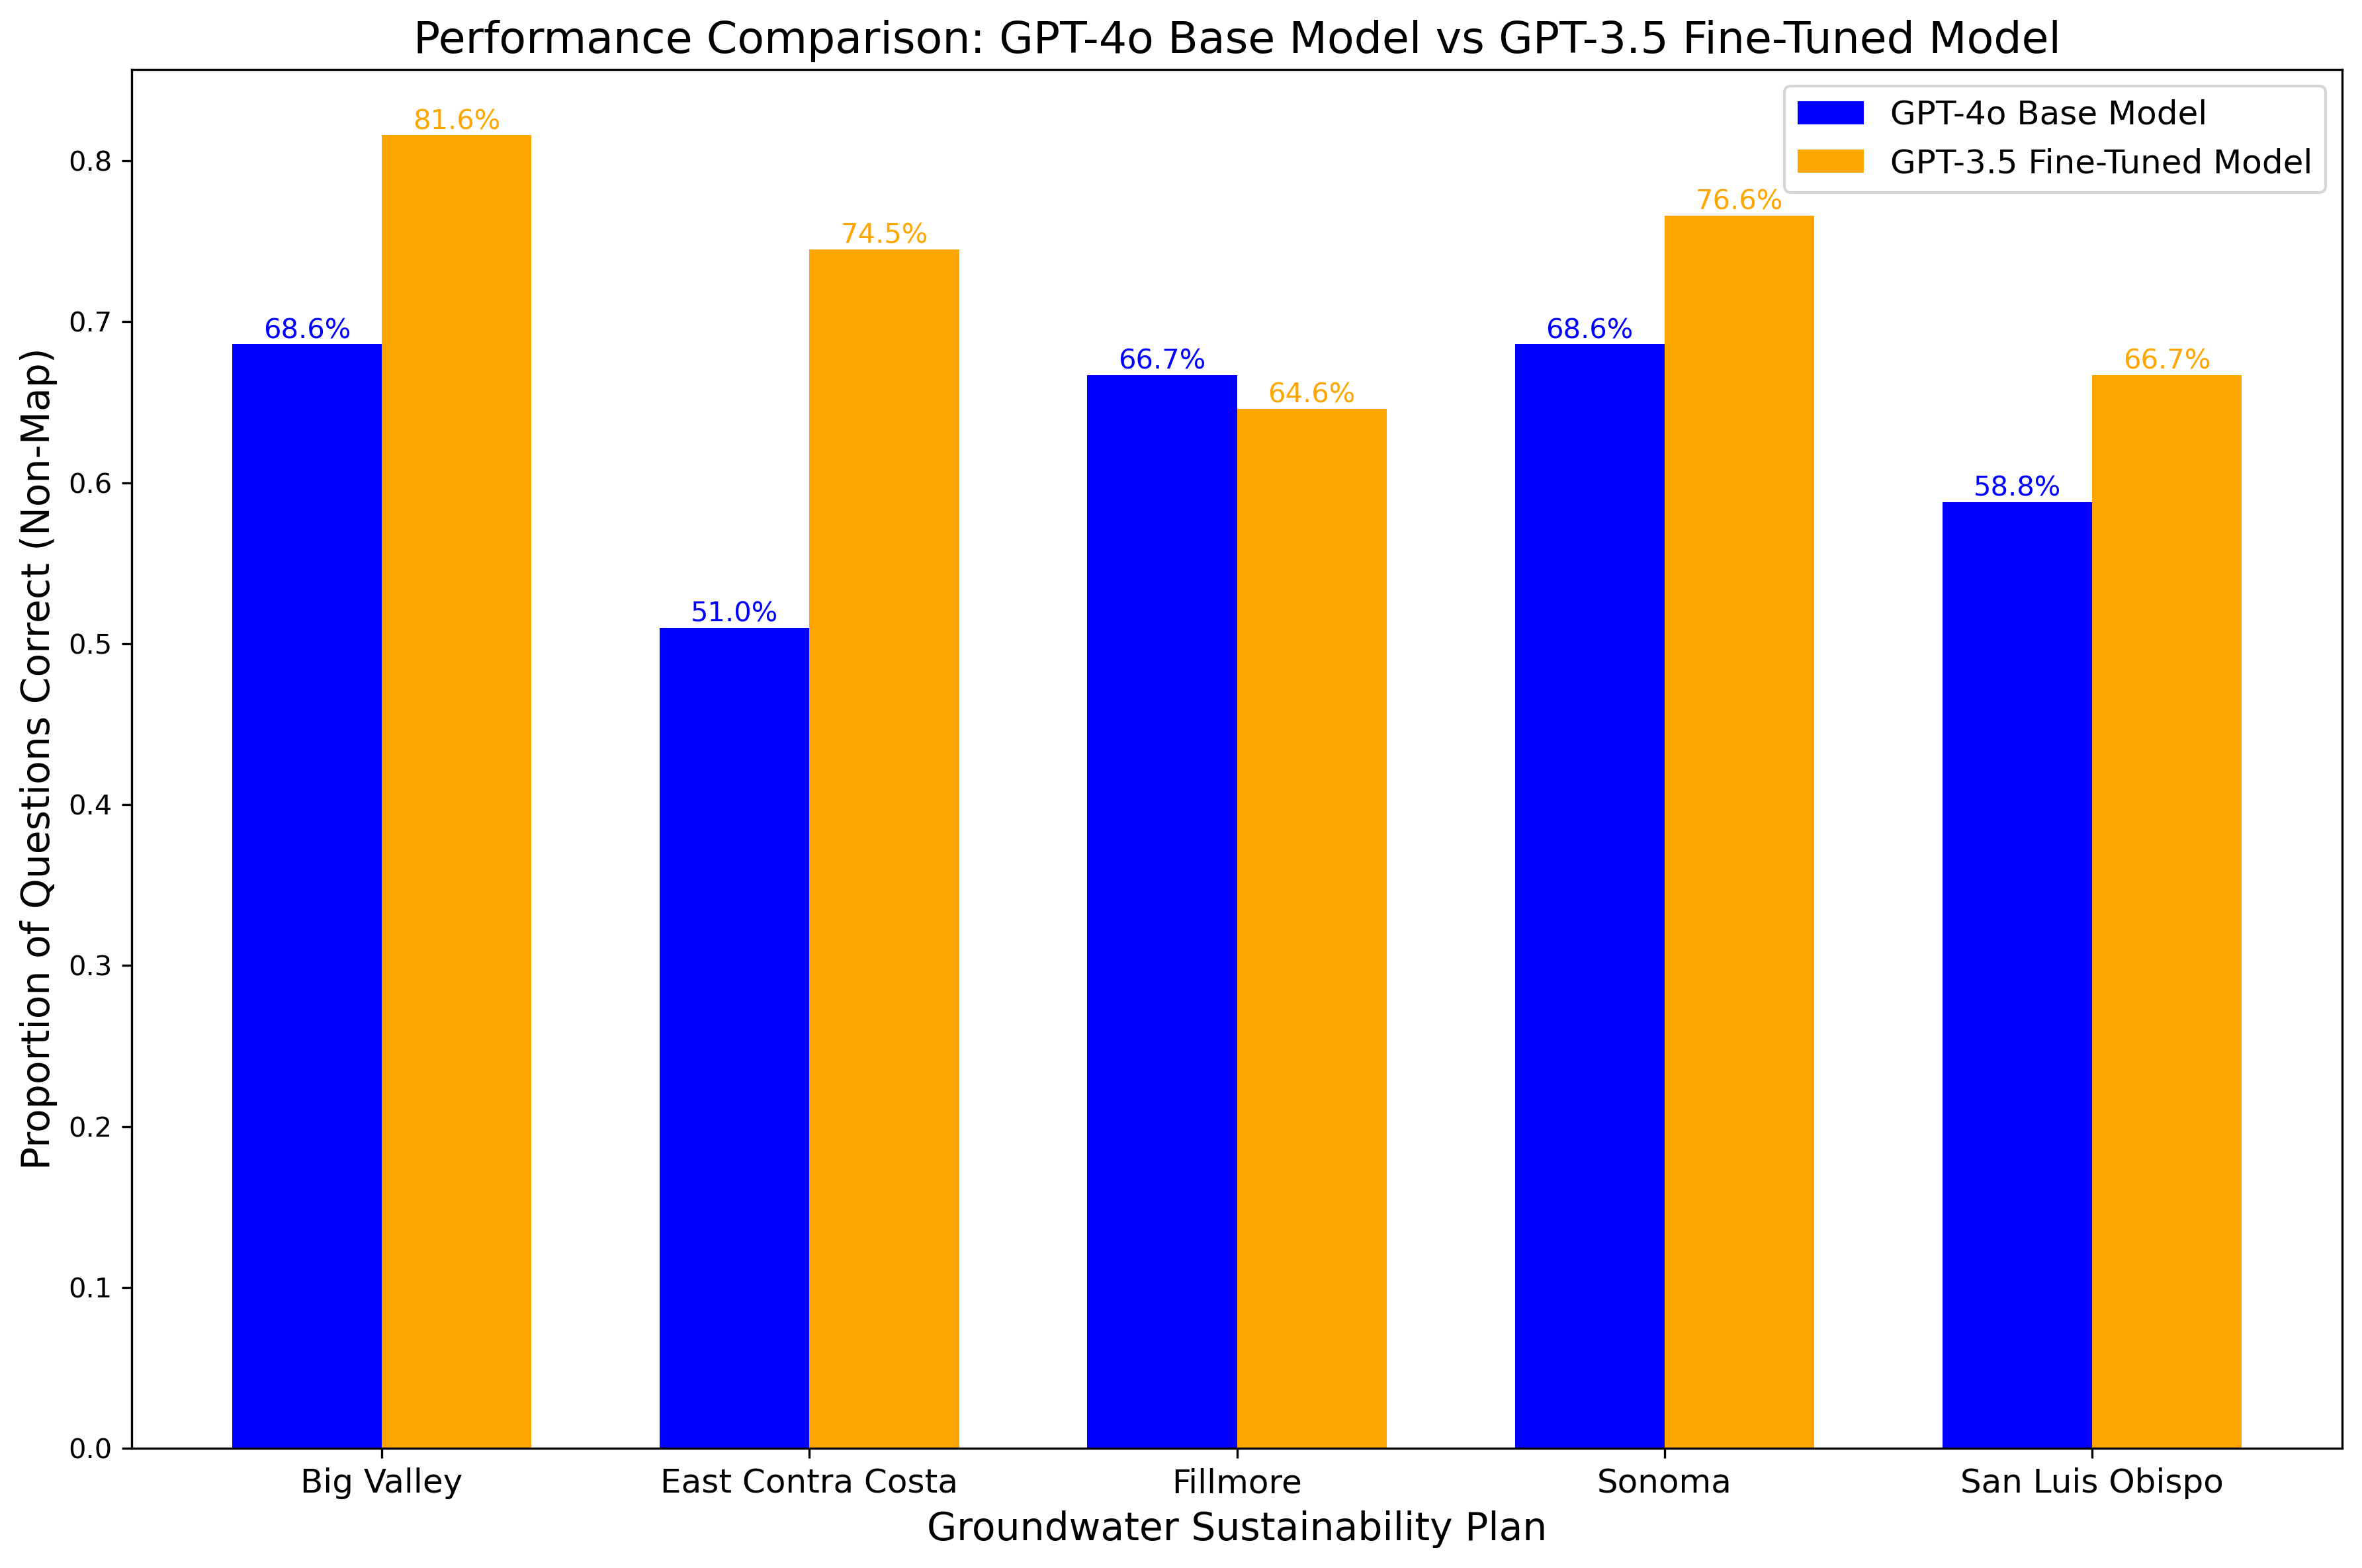

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example accuracies, replace these with your actual values retrieved from the previous step
x_labels = ['Big Valley', 'East Contra Costa', 'Fillmore', 'Sonoma', 'San Luis Obispo']

# Replace these lists with the actual accuracies for Rocs_Straight and Rocs_3.5
rocs_straight_accuracies = [0.686, 0.51, 0.667, 0.686, 0.588]  
rocs_3_5_accuracies = [0.816, 0.745, 0.646, 0.766, 0.667]       

x = np.arange(len(x_labels))  # the label locations

width = 0.35  # the width of the bars

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)  # High-resolution figure

# Plot bars for both models
bars1 = ax.bar(x - width/2, rocs_straight_accuracies, width, label='GPT-4o Base Model', color='blue')
bars2 = ax.bar(x + width/2, rocs_3_5_accuracies, width, label='GPT-3.5 Fine-Tuned Model', color='orange')

# Adding titles and labels
ax.set_title('Performance Comparison: GPT-4o Base Model vs GPT-3.5 Fine-Tuned Model', fontsize=16)
ax.set_xlabel('Groundwater Sustainability Plan', fontsize=14)
ax.set_ylabel('Proportion of Questions Correct (Non-Map)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=12)
ax.legend(fontsize=12)

# Add percentage labels to the bars
for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1%}', va='bottom', ha='center', fontsize=10, color='blue')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1%}', va='bottom', ha='center', fontsize=10, color='orange')

# Show the plot
plt.tight_layout()
plt.savefig('accuracy_comparison.png', bbox_inches='tight')
plt.show()

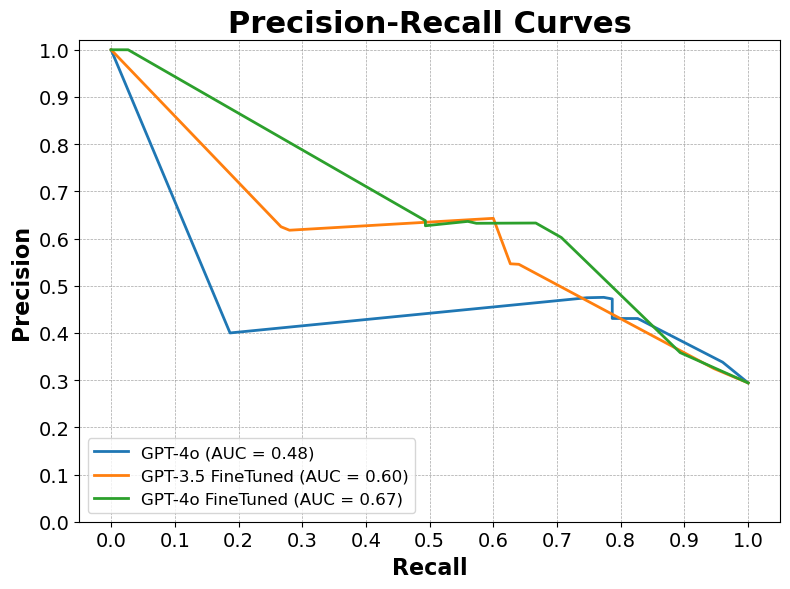

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Read the CSV file
df = pd.read_csv('graphs9_29.csv')

# Extract the true labels
y_true = df['Human Answers']
y_true = [1 if value == 'Yes' else 0 for value in y_true]

# Define the score columns and corresponding labels and colors
score_columns = ['Rocs_Straight', 'Rocs_3.5', 'Rocs_4o']
labels = ['GPT-4o', 'GPT-3.5 FineTuned', 'GPT-4o FineTuned']
colors = ['tab:blue', 'tab:orange', 'tab:green']

# Create a figure for the Precision-Recall curve
fig, ax = plt.subplots(figsize=(8, 6))

# Plot Precision-Recall Curves
for y_scores_col, label, color in zip(score_columns, labels, colors):
    y_scores = df[y_scores_col]
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    auprc = auc(recall, precision)
    ax.plot(recall, precision, color=color, lw=2,
            label=f'{label} (AUC = {auprc:.2f})')

# Customize the Precision-Recall plot
ax.set_title('Precision-Recall Curves', fontsize=22, fontweight='bold')
ax.set_xlabel('Recall', fontsize=16, fontweight='bold')
ax.set_ylabel('Precision', fontsize=16, fontweight='bold')
ax.set_ylim([0.0, 1.02])
ax.set_xticks([i/10.0 for i in range(11)])
ax.set_yticks([i/10.0 for i in range(11)])
ax.tick_params(axis='both', labelsize=14)
ax.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.7)
ax.legend(loc="lower left", fontsize=12)

# Save the figure
plt.tight_layout()
plt.savefig('final_vis_f.png', dpi=1200)
plt.show()

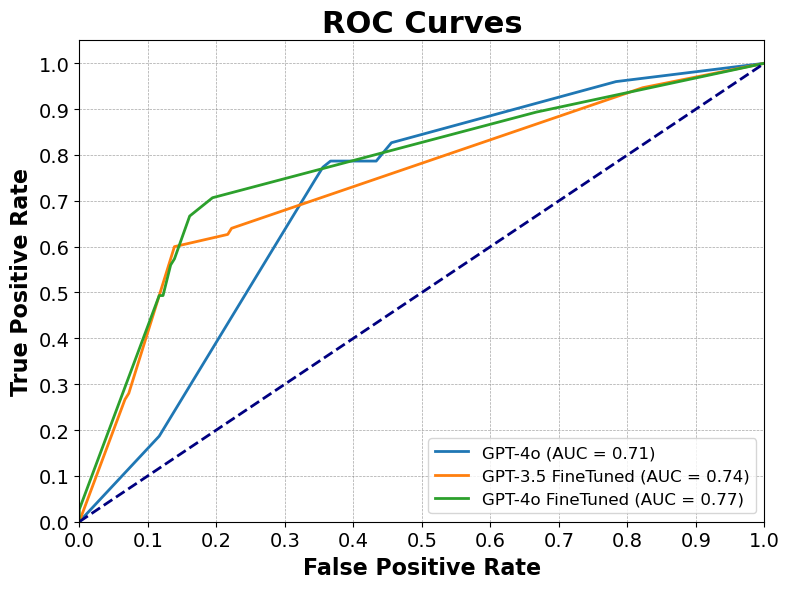

In [41]:
# Create a figure for the ROC curve
fig, ax = plt.subplots(figsize=(8, 6))

# Plot ROC Curves
for y_scores_col, label, color in zip(score_columns, labels, colors):
    y_scores = df[y_scores_col]
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, color=color, lw=2,
            label=f'{label} (AUC = {roc_auc:.2f})')

# Plot the baseline (diagonal line)
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Customize the ROC plot
ax.set_title('ROC Curves', fontsize=22, fontweight='bold')
ax.set_xlabel('False Positive Rate', fontsize=16, fontweight='bold')
ax.set_ylabel('True Positive Rate', fontsize=16, fontweight='bold')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xticks([i/10 for i in range(11)])
ax.set_yticks([i/10 for i in range(11)])
ax.tick_params(axis='both', labelsize=14)
ax.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.7)
ax.legend(loc="lower right", fontsize=12)

# Save the figure
plt.tight_layout()
plt.savefig('final_vis_g.png', dpi=1200)
plt.show()